In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import special
from scipy.stats import expon

import matplotlib.pylab as plt

from IPython.display import Markdown

In [3]:
def exp(x, tau):
    return 1/tau * np.exp(x/tau)

In [4]:
tau  = 1.
x = np.linspace(0, 10, 1000)
y = exp(x, tau)

In [5]:
nevents = 50
data = np.random.exponential(tau, nevents)

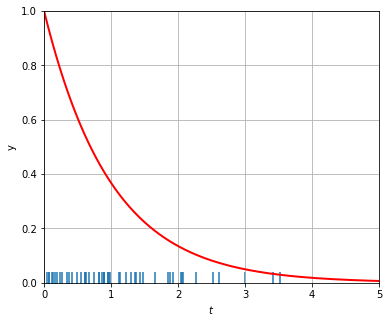

In [19]:
fig, ax = plt.subplots(figsize=(6,5)) 

ax.scatter(data, np.zeros(nevents), s = 500, marker = '|') 
ax.plot(x, expon(0,tau).pdf(x), lw=2, color="red")
ax.set_xlim(0,5)
ax.set_ylim(0,1)
ax.set_xlabel("$t$")
ax.set_ylabel("y")
ax.grid()
fig.savefig("./figs/tau_distribution.png")

In [15]:
tau_estimate =  1./nevents * np.sum(data)
print (f"Best estimate is {tau_estimate:.2f}")

Best estimate is 1.01


In [17]:
nexperiments = 100
tau_estimates = []
for i in range(0, nexperiments):
   data = np.random.exponential(tau, nevents)
   tau_estimates.append(1./nevents * np.sum(data))

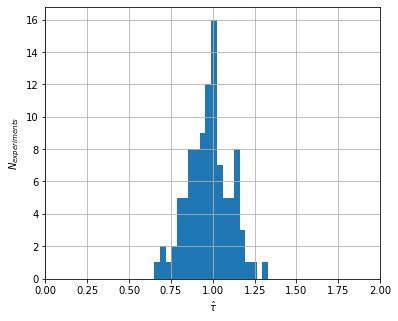

In [32]:
fig, ax2 = plt.subplots(figsize=(6,5)) 
ax2.hist(tau_estimates, bins = 20)
ax2.grid()
ax2.set_xlim(0, 2)
ax2.set_xlabel(r"$\hat{\tau}$")
ax2.set_ylabel("$N_{experiments}$")
fig.savefig("./figs/tau_estimate_distribution.png")
plt.show()